In [1]:
export = True

In [2]:
export = True

In [2]:
# parse
import re
loss_regex = r"Average loss: (\d+\.\d+)"
acc_regex = r"Accuracy: (\d+\/\d+)"
comp_regex = r"Bandwidth savings: from \d+ to \d+ \((\d+\.\d+)x\)"

def parse(file, regex):
    nums = []
    for line in open(file, "r").readlines():
        matches = re.search(regex, line)
        if matches:
            nums.append(float(eval(matches.group(1))))
    return nums

def parse_loss(file):
    return parse(file, acc_regex)

def parse_comp_ratio(file):
    return parse(file, comp_regex)


In [101]:
from os import listdir
import pandas as pd

data = {
    "loss": [],
    "name": []
}

files = [file for file in listdir("logs") if "mnist" in file and "8" in file]
files.sort(reverse=True)

for name in files:
    file = f"logs/{name}"
    attrs = {}
    data["loss"].append(parse_loss(file))

    name = name.removeprefix('mnist_')
    name = name.removesuffix('.log')

    data["name"].append(name)
    

df = pd.DataFrame(data)
df

,loss,name
0,"[0.2039, 0.2063, 0.348, 0.4265, 0.5289, 0.6288...",cifar_6gpus_relay_rand_top
1,"[0.2034, 0.2439, 0.3788, 0.5202, 0.5773, 0.603...",cifar_6gpus_relay_dbt_top
2,"[0.1, 0.2157, 0.2254, 0.3408, 0.4923, 0.5527, ...",cifar_6_gpus_relay_heterogenous_lr0-05_a0-1_ep...
3,"[0.1354, 0.1625, 0.1439, 0.1725, 0.1625, 0.153...",cifar_6_gpus_decentralized_heterogenous_lr0-05...
4,"[0.2883, 0.4193, 0.5084, 0.592, 0.6548, 0.6943...",cifar_6_gpus_allreduce_heterogenous_lr0-05_a0-...


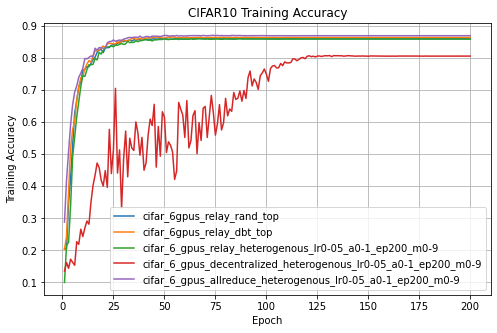

In [104]:
import numpy as np
import matplotlib.pyplot as plt
    
num_epochs = None

plt.figure(figsize=(8, 5)) 
for i, row in df.iterrows():
    row_iters = len(row["loss"])
    if num_epochs is None: num_epochs = row_iters
    else: assert row_iters == num_epochs, "number of its should be consistent"
    t = np.arange(1, num_epochs + 1)
    plt.plot(t, row["loss"], label=row["name"])

plt.title(f"MNIST Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Training Accuracy")
#plt.ylim(0.5, 0.9)
#plt.yscale("log")
plt.grid(True)
plt.legend()
plt.show()